In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pickle

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import os.path as osp
import os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, OneHotEncoder
)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel #para seleccionar los coeficientes de lasso
from sklearn.metrics import roc_auc_score, f1_score
from sklearn import set_config
set_config(display="diagram")

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
!pip install fastai wwf bayesian-optimization -q --upgrade
from bayes_opt import BayesianOptimization
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events

import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 757.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.4 MB/s eta 0:00:00


In [2]:
#DATA_DIR = "/kaggle/input/fa-ii-2024-ii-flujos-de-modelos-tradicionales/"
#df = pd.read_parquet(osp.join(DATA_DIR, "df_train.parquet"))
df = pd.read_parquet("df_train.parquet")
df

,MEDICAMENTOS,MEDICINA ESPECIALIZADA,MEDICINA GENERAL,Cant_gr_flia,Cant_riesgos_flia_mean,min_Tiempo_CP_Fliar,Cant_Fliar_CP,psa_max_gr_flia,psa_min_gr_flia,Cant_Fliar_riesgos,...,CORONARIOS_FAMILIAR,CEREBRAL,CEREBRAL_FAMILIAR,ENFERMEDAD_RENAL,ENFERMEDAD_RENAL_FAMILIAR,OTROS_ANTECEDENTES_VASCULARES,Target,Pendiente,Intercepto,Promedio_costo
ID,,,,,,,,,,,,,,,,,,,,,
16484,12.0,3.0,3.0,2,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,58373.057143,-110021.200000,1.885690e+05
11528,6.0,1.0,1.0,2,0.5,NaN,0.0,NaN,NaN,1.0,...,0,0,0,0,0,0,0,19618.942857,-36176.133333,9.747050e+04
26630,1.0,0.0,2.0,2,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,1,398534.000000,-626628.000000,2.304723e+06
12586,6.0,0.0,2.0,2,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,1292.600000,13410.733333,5.380450e+04
11225,3.0,0.0,2.0,1,1.0,NaN,0.0,NaN,NaN,1.0,...,2,2,2,2,2,2,0,13728.714286,-27375.666667,4.134967e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,0.0,0.0,1.0,3,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,6628.571429,-15466.666667,4.640000e+04
15417,6.0,0.0,3.0,1,1.0,NaN,0.0,NaN,NaN,1.0,...,2,2,2,2,2,2,0,36161.142857,-66307.333333,9.038500e+04
19389,8.0,2.0,2.0,1,0.0,NaN,0.0,NaN,NaN,0.0,...,2,2,2,2,2,2,0,15912.885714,16190.066667,1.078278e+05


In [3]:
#DATA_DIR = "/kaggle/input/fa-ii-2024-ii-flujos-de-modelos-tradicionales/"
#df1 = pd.read_parquet(osp.join(DATA_DIR, "df_test.parquet"))
df1 = pd.read_parquet("df_test.parquet")
df1

,MEDICAMENTOS,MEDICINA ESPECIALIZADA,MEDICINA GENERAL,Cant_gr_flia,Cant_riesgos_flia_mean,min_Tiempo_CP_Fliar,Cant_Fliar_CP,psa_max_gr_flia,psa_min_gr_flia,Cant_Fliar_riesgos,...,CORONARIOS,CORONARIOS_FAMILIAR,CEREBRAL,CEREBRAL_FAMILIAR,ENFERMEDAD_RENAL,ENFERMEDAD_RENAL_FAMILIAR,OTROS_ANTECEDENTES_VASCULARES,Pendiente,Intercepto,Promedio_costo
ID,,,,,,,,,,,,,,,,,,,,,
12596,2.0,4.0,2.0,2,0.000000,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,5.421180e+06,-1.256617e+07,9.611937e+06
29326,4.0,0.0,1.0,1,0.000000,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,-9.504343e+03,5.997787e+04,8.013800e+04
24338,0.0,0.0,1.0,2,0.000000,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,2.477143e+03,-5.780000e+03,1.734000e+04
11167,1.0,0.0,0.0,1,0.000000,NaN,0.0,NaN,NaN,0.0,...,1,0,1,0,1,0,0,3.597143e+03,-8.393333e+03,2.518000e+04
22074,36.0,0.0,1.0,3,0.666667,NaN,0.0,NaN,NaN,1.0,...,0,0,0,0,0,0,0,-9.042514e+03,6.309881e+05,5.993393e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6392,35.0,2.0,0.0,4,0.500000,NaN,0.0,NaN,NaN,1.0,...,2,2,2,2,2,2,2,6.545311e+04,2.384719e+05,5.610694e+05
5998,4.0,3.0,1.0,1,0.000000,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,-5.250857e+03,5.109600e+04,4.907700e+04
12654,0.0,0.0,1.0,2,0.000000,NaN,0.0,NaN,NaN,0.0,...,0,1,0,0,0,0,0,2.438571e+03,-5.690000e+03,1.707000e+04


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10069 entries, 12596 to 22281
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MEDICAMENTOS                   10069 non-null  float64
 1   MEDICINA ESPECIALIZADA         10069 non-null  float64
 2   MEDICINA GENERAL               10069 non-null  float64
 3   Cant_gr_flia                   10069 non-null  int64  
 4   Cant_riesgos_flia_mean         10069 non-null  float64
 5   min_Tiempo_CP_Fliar            2 non-null      float64
 6   Cant_Fliar_CP                  10069 non-null  float64
 7   psa_max_gr_flia                76 non-null     float64
 8   psa_min_gr_flia                76 non-null     float64
 9   Cant_Fliar_riesgos             10069 non-null  float64
 10  cantidad_serv_flia             10069 non-null  float64
 11  Pendiente_flia                 10069 non-null  float64
 12  Intercepto_flia                10069 non-null  

In [5]:
X, y = df.drop(columns="Target"), df["Target"]
y.value_counts(True) * 100

,proportion
Target,
0,71.537414
1,28.462586


In [6]:
porcetaje_de_nulidad = (
    X.isnull()
    .apply(lambda s: s.value_counts(True)).T
)

porcetaje_de_nulidad.columns = ['not_null', 'null']
variables_muy_nulas = porcetaje_de_nulidad.query('null > 0.7').index

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [8]:
numericas = X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19969 entries, 18135 to 2509
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MEDICAMENTOS                   19969 non-null  float64
 1   MEDICINA ESPECIALIZADA         19969 non-null  float64
 2   MEDICINA GENERAL               19969 non-null  float64
 3   Cant_gr_flia                   19969 non-null  int64  
 4   Cant_riesgos_flia_mean         19969 non-null  float64
 5   min_Tiempo_CP_Fliar            7 non-null      float64
 6   Cant_Fliar_CP                  19969 non-null  float64
 7   psa_max_gr_flia                143 non-null    float64
 8   psa_min_gr_flia                143 non-null    float64
 9   Cant_Fliar_riesgos             19969 non-null  float64
 10  cantidad_serv_flia             19969 non-null  float64
 11  Pendiente_flia                 19969 non-null  float64
 12  Intercepto_flia                19969 non-null  f

In [9]:
var_numericas = X_train.select_dtypes('number').columns
var_categoricas = X_train.select_dtypes('object').columns

In [11]:
var_numericas

Index(['MEDICAMENTOS', 'MEDICINA ESPECIALIZADA', 'MEDICINA GENERAL',
       'Cant_gr_flia', 'Cant_riesgos_flia_mean', 'min_Tiempo_CP_Fliar',
       'Cant_Fliar_CP', 'psa_max_gr_flia', 'psa_min_gr_flia',
       'Cant_Fliar_riesgos', 'cantidad_serv_flia', 'Pendiente_flia',
       'Intercepto_flia', 'Promedio_costo_flia', 'EDAD', 'RIESGOS',
       'CANTIDAD_SERVICIOS', 'PERDIDA_DE_PESO', 'TIEMPO_ULTIMA_CITA',
       'conteo_dx_diferentes', 'TIEMPO_AFILIACION', 'Pendiente', 'Intercepto',
       'Promedio_costo'],
      dtype='object')

In [18]:
#columnas_numerico=['MULTI_CANCER','RIESGOS','CESION','CANCER_MAMA_FAMILIAR','CANCER_OTRO_SITIO','CANCER_OTRO_SITIO_FAMILIAR','CEREBRAL_FAMILIAR']
columnas_numerico=['RIESGOS','CANCER_MAMA_FAMILIAR','CANCER_OTRO_SITIO','CANCER_OTRO_SITIO_FAMILIAR','CEREBRAL_FAMILIAR']
X[columnas_numerico] = X[columnas_numerico].astype(float)

columnas_categ= [#'GENERO','ESTADO_CIVIL',#'CODIGO_SEDE',
                 'CANCER_MAMA_FAMILIAR',#'CESION'
                'CANCER_OTRO_SITIO','CANCER_OTRO_SITIO_FAMILIAR','CEREBRAL_FAMILIAR'
                #,'atencion_nutricion'
                ]
X[columnas_categ] = X[columnas_categ].astype(str)

In [15]:
print(y_train.value_counts(True)*100)
print(y_test.value_counts(True)*100)

Target
0    71.590966
1    28.409034
Name: proportion, dtype: float64
Target
0    71.234043
1    28.765957
Name: proportion, dtype: float64


In [34]:
#var_categoricas = [#'GENERO','ESTADO_CIVIL',#'CODIGO_SEDE',
#                 'CESION','CANCER_MAMA_FAMILIAR',
#                'CANCER_OTRO_SITIO','CANCER_OTRO_SITIO_FAMILIAR','CEREBRAL_FAMILIAR'
#                ,'atencion_nutricion'
#                ]

var_categoricas =   [#'GENERO','ESTADO_CIVIL',#'CODIGO_SEDE',
                 'CANCER_MAMA_FAMILIAR',#'CESION'
                'CANCER_OTRO_SITIO','CANCER_OTRO_SITIO_FAMILIAR','CEREBRAL_FAMILIAR'
                #,'atencion_nutricion'
                ]


var_numericas = X_train.select_dtypes('number').columns

# Data Processing

Ejemplo sobre como usar Pipelines: https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

https://towardsdatascience.com/creating-custom-transformers-for-sklearn-pipelines-d3d51852ecc1

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

In [36]:
class LDATransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None

    def fit(self, X, y=None):
        self.clf = LinearDiscriminantAnalysis()
        self.clf.fit(X,y)
        return self

    def transform(self, X, y=None):
      # Perform arbitary transformation
        X_transformed = X.copy()
        lda = pd.DataFrame(self.clf.transform(X_transformed)).rename(columns={0:'LDA'})
        X_transformed=pd.DataFrame(X_transformed)
        X_transformed = pd.concat([X_transformed,lda],axis=1)
        return X_transformed

In [37]:
Imputer = SimpleImputer(strategy="median")
Scaler = StandardScaler()
LDA = LinearDiscriminantAnalysis()

In [38]:
LDA = LinearDiscriminantAnalysis()

In [39]:
X_num = X[var_numericas].copy()

In [40]:
Imputer.fit(X_num)
X_num_proces = Imputer.transform(X_num)

In [41]:
X_num_proces

array([[ 1.20000000e+01,  3.00000000e+00,  3.00000000e+00, ...,
         5.83730571e+04, -1.10021200e+05,  1.88569000e+05],
       [ 6.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.96189429e+04, -3.61761333e+04,  9.74705000e+04],
       [ 1.00000000e+00,  0.00000000e+00,  2.00000000e+00, ...,
         3.98534000e+05, -6.26628000e+05,  2.30472300e+06],
       ...,
       [ 8.00000000e+00,  2.00000000e+00,  2.00000000e+00, ...,
         1.59128857e+04,  1.61900667e+04,  1.07827750e+05],
       [ 3.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         2.68557143e+03, -6.26633333e+03,  1.87990000e+04],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         2.85142857e+03, -6.34666667e+03,  1.09000000e+04]])

In [42]:
Scaler.fit(X_num_proces)
X_num_proces = Scaler.transform(X_num_proces)

In [43]:
X_num_proces

array([[ 0.76984674,  0.64254   ,  1.31251284, ...,  0.10191148,
        -0.13996397, -0.08575848],
       [ 0.09040349, -0.10681889, -0.18253827, ...,  0.01116478,
        -0.10014869, -0.14971118],
       [-0.47579922, -0.48149833,  0.56498729, ...,  0.89843291,
        -0.41850448,  1.39981773],
       ...,
       [ 0.31688457,  0.26786056,  0.56498729, ...,  0.00248667,
        -0.07191425, -0.14244022],
       [-0.24931814, -0.48149833, -0.18253827, ..., -0.02848643,
        -0.08402213, -0.20493992],
       [-0.58903976, -0.48149833, -0.18253827, ..., -0.02809806,
        -0.08406545, -0.21048515]])

In [44]:
LDA.fit(X_num_proces,y)

LinearDiscriminantAnalysis()

In [45]:
X_num_proces = LDA.transform(X_num_proces)

In [46]:
X_num_proces

array([[ 0.21613026],
       [ 0.20598714],
       [ 1.78390693],
       ...,
       [-0.34878631],
       [ 0.54346203],
       [ 0.23996928]])

In [47]:
numeric_transformer = Pipeline(
    steps=[
           ("imputer", SimpleImputer(strategy="median")), 
           ("scaler", StandardScaler()), 
           ("LDA_feature",LDATransformer())
           ]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore", drop="if_binary")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, var_numericas),
        ("cat", categorical_transformer, var_categoricas),
    ]
)

In [48]:
preprocessor.fit(X,y)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler()),
                                                 ('LDA_feature',
                                                  LDATransformer())]),
                                 Index(['MEDICAMENTOS', 'MEDICINA ESPECIALIZADA', 'MEDICINA GENERAL',
       'Cant_gr_flia', 'Cant_riesgos_flia_mean', 'min_Tiempo_CP_Fliar',
       'Cant_Fliar_CP', 'psa_max_gr_flia', 'psa_min_gr_flia',
       'Cant_Fli...
       'Intercepto_flia', 'Promedio_costo_flia', 'EDAD', 'RIESGOS',
       'CANTIDAD_SERVICIOS', 'PERDIDA_DE_PESO', 'TIEMPO_ULTIMA_CITA',
       'conteo_dx_diferentes', 'TIEMPO_AFILIACION', 'Pendiente', 'Intercepto',
       'Promedio_costo'],
      dtype='object')),
                                ('cat',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore'),
                                 ['CANCER_MAMA_FAMILIAR', 'CANCER_OTRO_SITIO',
                                  'CANCER_OTRO_SITIO_FAMILIAR',
                                  'CEREBRAL_FAMILIAR'])])

In [49]:
X_a=preprocessor.transform(X)

In [50]:
def add_model(data_pipeline, model) -> Pipeline:
    whole_pipeline = Pipeline([
        ("data_pipeline", data_pipeline),
        ("model", model)
    ])
    return whole_pipeline

# Bayesian optimization

In [51]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title='', win_size: int = 100):
    """
    Función para mostrar en tiempo real el progreso de la optmización bayesiana.
    """
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        if len(data) > win_size:
            data = data[-win_size:]
            iterations = np.arange(len(data))[-win_size:]
        else:
            iterations = np.arange(len(data))
        plt.plot(iterations, data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('Iteration')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

In [52]:
data = collections.defaultdict(list)

def train_and_evaluate(
    # Data
    scaler_choice,
    imputer_strategy,
    knn_imputer,
    knn_imputer_k,
    #pca_components,
    # Model
    model_hidden_layer_size_exp,
    model_lr_init,
    model_alpha,
    model_batch_size,
    model_max_iter,
    #model_solver,
    verbose=0,
    show_live_plot=True

) -> float:
    scaler_cls = StandardScaler if scaler_choice > 0.5 else MinMaxScaler
    imputer_strategy = "mean" if imputer_strategy > 0.5 else "median"
    if knn_imputer > 0.5:
        imputer = KNNImputer(n_neighbors=int(knn_imputer_k))
    else:
        imputer = SimpleImputer(strategy=imputer_strategy)

    numeric_transformer = Pipeline(
        steps=[("imputer", imputer),
               ("scaler", scaler_cls()),
               ("LDA_feature",LDATransformer())
              ]
    )

    categorical_transformer = OneHotEncoder(handle_unknown="ignore")
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, var_numericas),
            ("cat", categorical_transformer, var_categoricas),
        ]
    )

    data_pipeline = Pipeline(steps=[
        ("data_processor", preprocessor),

    ])

    ## Model configuration

    max_exponent = int(model_hidden_layer_size_exp)
    if max_exponent<2:
        max_exponent=2

    model_kwargs = dict(
        hidden_layer_sizes = [2**(n) for n in reversed(range(2, max_exponent+1))], ### Arquitectura
        #solver="adam" if model_solver > 0.5 else "sgd",
        batch_size=2**int(model_batch_size), ## Back Propagation
        learning_rate_init=model_lr_init,## Back Propagation
        alpha=model_alpha,## Back Propagation
        max_iter=int(model_max_iter),
        early_stopping=True,
        random_state=42,
    )

    if verbose:
        print("MLP Classifier params: ")
        pprint(model_kwargs)

    model = MLPClassifier(**model_kwargs)

    pipeline = add_model(data_pipeline, model)
    show_live_plot=True

    ## Training protocol

    kf = KFold(n_splits=3, random_state=963, shuffle=True)

    train_fold_metrics = []
    val_fold_metrics = []

    # K-Fold cross val
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        #print(f"Fold number: {i+1}")
        kX_train, kX_val = X_train.iloc[train_index], X_train.iloc[test_index]
        ky_train, ky_val = y_train.iloc[train_index], y_train.iloc[test_index]
        #print(f"Training with {kX_train.shape}")
        #print(f"Validating with {kX_val.shape}")
        pipeline.fit(kX_train, ky_train)

        val_preds = pipeline.predict_proba(kX_val)[:, 1]

        train_preds = pipeline.predict_proba(kX_train)[:, 1]

        ths = np.linspace(0, 1, 1000)
        best_th = ths[np.argmax([f1_score(ky_val, val_preds>th) for th in ths])]
        best_th

        val_f1 = f1_score(ky_val, val_preds>best_th)
        train_f1 = f1_score(ky_train, train_preds>best_th)

        train_fold_metrics.append(train_f1)
        val_fold_metrics.append(val_f1)

    f1_train = np.array(train_fold_metrics)
    f1_val = np.array(val_fold_metrics)

    adj_val_f1 = ( f1_val.mean() -  f1_val.std())
    adj_train_f1 = ( f1_train.mean() -  f1_train.std())
    objective = adj_val_f1 - abs(adj_val_f1 - adj_train_f1)

    print(f"Validation F1 adjusted score: {adj_val_f1}")
    print(f"Train F1 adjusted score: {adj_train_f1}")
    print()

    if show_live_plot:
        data['train_f1'].append(adj_train_f1)
        data['val_f1'].append(adj_val_f1)
        data["objective"].append(objective)
        live_plot(data)

    return pipeline, objective

def target_func(**kwargs):
    model, result = train_and_evaluate(**kwargs)
    return result


In [53]:
pbounds = dict(
    # Data
    scaler_choice=(0, 1),
    imputer_strategy=(0, 1),
    knn_imputer=(0,1),
    knn_imputer_k=(3, 10),
    # Model
    #model_solver=(0, 1),
    model_hidden_layer_size_exp=(2, 4),
    model_lr_init=(0.005, 0.5),
    model_alpha=(0.001, 1),
    model_batch_size=(3, 7), # from 2**6=64 to 2**12=4096
    model_max_iter=(50, 50)

)




In [54]:
data_plot = collections.defaultdict(list)

In [55]:
optimizer = BayesianOptimization(
    f=target_func,
    pbounds=pbounds,
    random_state=963,
    verbose=2,
)

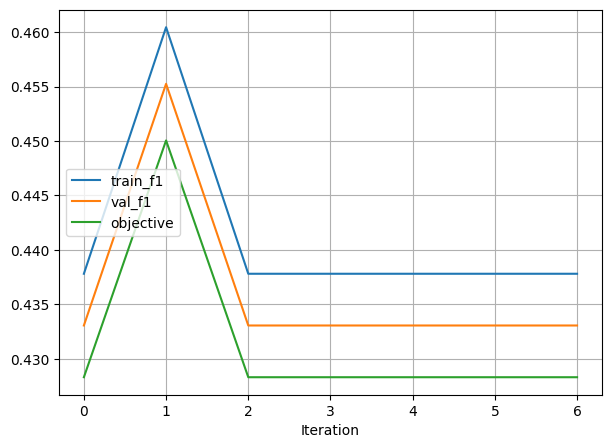

| 7         | 0.4283    | 0.07912   | 0.6014    | 5.9       | 0.4963    | 5.905     | 2.422     | 0.2698    | 50.0      | 0.8471    |


In [56]:
#logger = JSONLogger(path="./logs.json")
#optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

optimizer.maximize(
    init_points=2,
    n_iter=5,
)

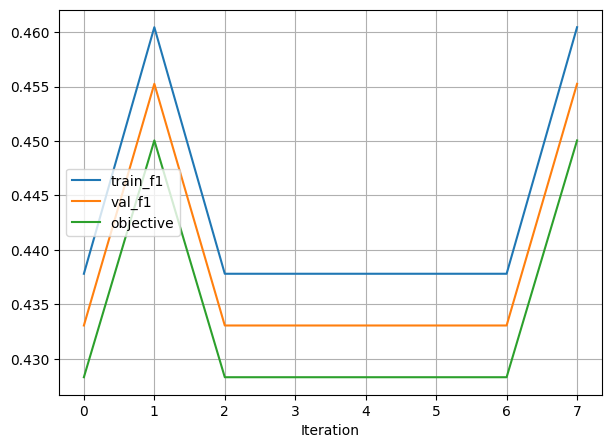

In [57]:
best_model, best_result = train_and_evaluate(**optimizer.max["params"])

In [58]:
test_preds = best_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, test_preds)

0.6269495089456489

In [59]:
best_model.fit(X, y)

Pipeline(steps=[('data_pipeline',
                 Pipeline(steps=[('data_processor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    KNNImputer(n_neighbors=8)),
                                                                                   ('scaler',
                                                                                    MinMaxScaler()),
                                                                                   ('LDA_feature',
                                                                                    LDATransformer())]),
                                                                   Index(['MEDICAMENTOS', 'MEDICINA ESPECIALIZADA', 'MEDICINA GENERAL',
       'Cant_gr_flia', 'Cant_riesgos_flia_mean', 'min_Tiempo_CP_Fliar',
       'Ca...
       'Promedio_costo'],
      dtype='object')),
                                                                  ('cat',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['CANCER_MAMA_FAMILIAR',
                                                                    'CANCER_OTRO_SITIO',
                                                                    'CANCER_OTRO_SITIO_FAMILIAR',
                                                                    'CEREBRAL_FAMILIAR'])]))])),
                ('model',
                 MLPClassifier(alpha=0.10642794547977139, batch_size=16,
                               early_stopping=True, hidden_layer_sizes=[8, 4],
                               learning_rate_init=0.008698159126584545,
                               max_iter=50, random_state=42))])

In [60]:
optimizer.max["params"]

{'imputer_strategy': 0.5593641233259324,
 'knn_imputer': 0.6128341180464585,
 'knn_imputer_k': 8.00741215202442,
 'model_alpha': 0.10642794547977139,
 'model_batch_size': 4.146054083733453,
 'model_hidden_layer_size_exp': 3.4044201806033625,
 'model_lr_init': 0.008698159126584545,
 'model_max_iter': 50.0,
 'scaler_choice': 0.010498378590719337}

In [61]:
with open("best_model_NN.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [62]:
test_preds = best_model.predict_proba(X_test)[:, 1]
train_preds = best_model.predict_proba(X_train)[:, 1]
ths = np.linspace(0, 1, 1000)
best_th = ths[np.argmax([f1_score(y_test, test_preds>th) for th in ths])]
best_th

0.2702702702702703

In [63]:
test_f1 = f1_score(y_test, test_preds>best_th)
train_f1 = f1_score(y_train, train_preds>best_th)
print(f"Train f1: {train_f1}")
print(f"Test f1: {test_f1}")

Train f1: 0.4657217240381834
Test f1: 0.48385012919896647


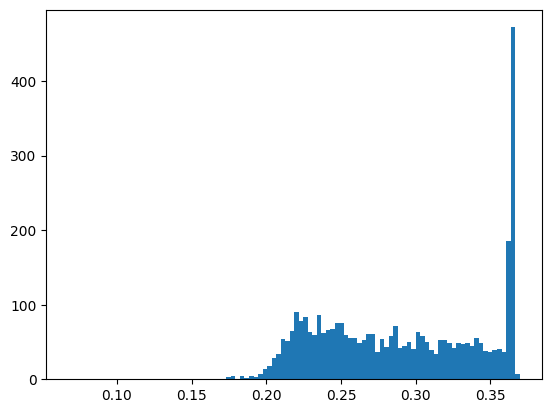

In [64]:
plt.hist(test_preds, bins=100)
plt.show()

# Submission

In [66]:
test_df = pd.read_parquet("df_test.parquet")
submission_pred = best_model.predict_proba(test_df)[:, 1]
submission_pred_bool = submission_pred>best_th
submission_pred_int = [int(item) for item in submission_pred_bool]
submission = pd.DataFrame(data=dict(ID=test_df.index, Target=submission_pred_int))
submission.to_csv("submission_NN.csv", index=False)